In [2]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [16]:
"""Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.
"""

'Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.\n'

In [4]:
# importing the train data using pandas.
data=pd.read_csv("E:\\Clustering\\crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
# creating a dataframe using pandas
df=pd.DataFrame(data)
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
...,...,...,...,...,...
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8


In [6]:
# now we have to perform EDA
df.shape

(50, 5)

In [7]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
# checking if there are any null values in the whole data using isna and sum function

df.isna().sum()

# we can see that  there are no null values in the whole data

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

array([[<AxesSubplot: title={'center': 'Murder'}>,
        <AxesSubplot: title={'center': 'Assault'}>],
       [<AxesSubplot: title={'center': 'UrbanPop'}>,
        <AxesSubplot: title={'center': 'Rape'}>]], dtype=object)

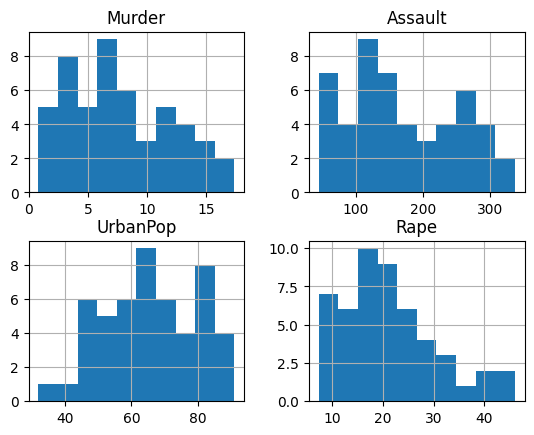

In [9]:
df.hist()

In [15]:
new_df = df.drop(labels='Unnamed: 0',axis=1)
new_df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [10]:
# Normalizing the data by using the data function

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
# creating a Normalize Data Frame

df_norm = norm_func(data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
...,...,...,...,...
45,0.463855,0.380137,0.525424,0.346253
46,0.192771,0.342466,0.694915,0.488372
47,0.295181,0.123288,0.118644,0.051680
48,0.108434,0.027397,0.576271,0.090439


In [12]:
df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [ ]:
min_max=MinMaxScaler()
min_max = pd.DataFrame(min_max.fit_transform(new_df))
min_max

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
...,...,...,...,...
45,0.463855,0.380137,0.525424,0.346253
46,0.192771,0.342466,0.694915,0.488372
47,0.295181,0.123288,0.118644,0.051680
48,0.108434,0.027397,0.576271,0.090439


In [ ]:
std_scaler = StandardScaler()
scaled_data=pd.DataFrame(std_scaler.fit_transform(new_df))
scaled_data

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
...,...,...,...,...
45,0.165131,-0.178909,-0.177259,-0.057376
46,-0.878533,-0.312242,0.520612,0.535792
47,-0.484260,-1.087999,-1.852151,-1.286851
48,-1.203228,-1.427393,0.032102,-1.125078


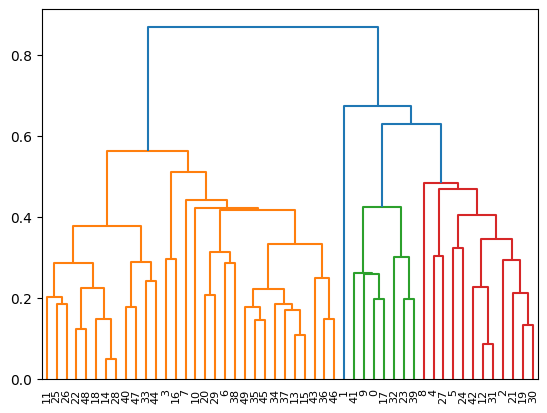

In [ ]:
#Create Dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_norm,method="average"))

# as per the dendrogram there are 4 clusters formed thereby showing that the optimum amount of clusters is 4
# so we go with 4/5 clusters

# KMeans clustering

In [ ]:
# k means clustering upto 10 number of clusters for standaard scalar data
ssc = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=2)
    km.fit(scaled_data)
    ssc.append(km.inertia_)

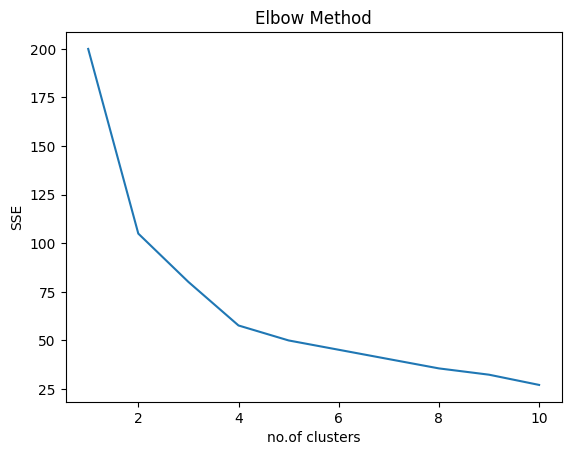

In [ ]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),ssc)
plt.title('Elbow Method')
plt.xlabel('no.of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# so as per the above graph shows that its better to go with 4 0r 5 clusters
# after 5 clusters there is not that much gradual change on the  line.

In [ ]:
# fitting the data uisng kmeans clustering
clusters_kmean = KMeans(n_clusters=4)
clusters_kmean.fit(scaled_data)

KMeans(n_clusters=4)

In [ ]:
clusters_kmean.labels_

array([0, 3, 3, 0, 3, 3, 2, 2, 3, 0, 2, 1, 3, 2, 1, 2, 1, 0, 1, 3, 2, 3,
       1, 0, 3, 1, 1, 3, 1, 2, 3, 3, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 3, 2,
       1, 2, 2, 1, 1, 2])

In [ ]:
 # Assign clusters to the data set
crime_data=df.copy()
crime_data['cluster']=clusters_kmean.labels_
crime_data

,country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3
...,...,...,...,...,...,...
45,Virginia,8.5,156,63,20.7,2
46,Washington,4.0,145,73,26.2,2
47,West Virginia,5.7,81,39,9.3,1
48,Wisconsin,2.6,53,66,10.8,1


In [ ]:
# k means clustering upto 10 number of clusters for minmax data
ssc = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=2)
    km.fit(min_max)
    ssc.append(km.inertia_)

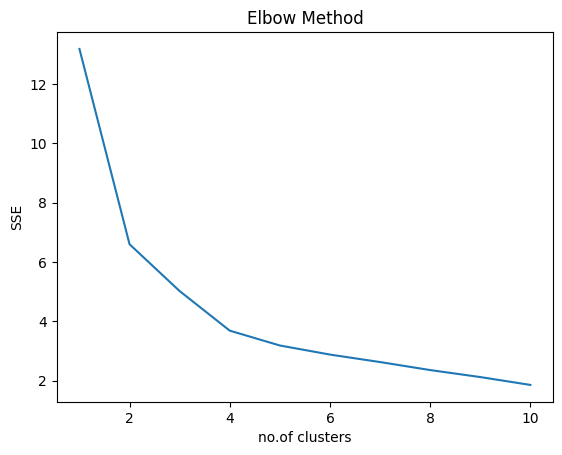

In [ ]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),ssc)
plt.title('Elbow Method')
plt.xlabel('no.of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# so as per the above graph shows that its better to go with 4 0r 5 clusters
# after 5 clusters there is not that much gradual change on the  line.

In [ ]:
# fitting the data uisng kmeans clustering
clusters_kmean = KMeans(n_clusters=4)
clusters_kmean.fit(scaled_data)

KMeans(n_clusters=4)

In [ ]:
clusters_kmean.labels_

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [ ]:
 # Assign clusters to the data set
crime_data=df.copy()
crime_data['cluster']=clusters_kmean.labels_
crime_data

,country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
...,...,...,...,...,...,...
45,Virginia,8.5,156,63,20.7,3
46,Washington,4.0,145,73,26.2,3
47,West Virginia,5.7,81,39,9.3,0
48,Wisconsin,2.6,53,66,10.8,0


## Hierarchical

In [ ]:
#Creating Clusters using hierarchiall clustering
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average")

In [ ]:
y_hc=hc.fit_predict(scaled_data)
Clusters_hc = pd.DataFrame(y_hc,columns=["Clusters"])

In [ ]:
 # Assign clusters to the data set
crime_data1=df.copy()
crime_data1['cluster']=Clusters_hc
crime_data1

,country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
...,...,...,...,...,...,...
45,Virginia,8.5,156,63,20.7,0
46,Washington,4.0,145,73,26.2,0
47,West Virginia,5.7,81,39,9.3,4
48,Wisconsin,2.6,53,66,10.8,0


In [ ]:
crime_data1[crime_data1['cluster']==0]

,country,Murder,Assault,UrbanPop,Rape,cluster
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
...,...,...,...,...,...,...
43,Utah,3.2,120,80,22.9,0
45,Virginia,8.5,156,63,20.7,0
46,Washington,4.0,145,73,26.2,0
48,Wisconsin,2.6,53,66,10.8,0


In [ ]:
crime_data1[crime_data1['cluster']==1]

,country,Murder,Assault,UrbanPop,Rape,cluster
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
...,...,...,...,...,...,...
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1
31,New York,11.1,254,86,26.1,1


In [ ]:
crime_data1[crime_data1['cluster']==2]

,country,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,2


In [ ]:
data.iloc[:,1:].groupby(crime_data1.cluster).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,6.055556,140.055556,71.333333,18.683333
1,10.883333,256.916667,78.333333,32.250000
2,10.000000,263.000000,48.000000,44.500000
3,14.671429,251.285714,54.285714,21.685714
4,3.091667,76.000000,52.083333,11.833333


In [ ]:
crime_data1.corr()

,Murder,Assault,UrbanPop,Rape,cluster
Murder,1.000000,0.801873,0.069573,0.563579,0.135530
Assault,0.801873,1.000000,0.258872,0.665241,-0.007769
UrbanPop,0.069573,0.258872,1.000000,0.411341,-0.613759
Rape,0.563579,0.665241,0.411341,1.000000,-0.186830
cluster,0.135530,-0.007769,-0.613759,-0.186830,1.000000


In [ ]:
y_hc=hc.fit_predict(min_max)
Clusters_hc = pd.DataFrame(y_hc,columns=["Clusters"])

In [ ]:
 # Assign clusters to the data set
crime_data1=df.copy()
crime_data1['cluster']=Clusters_hc
crime_data1

,country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
...,...,...,...,...,...,...
45,Virginia,8.5,156,63,20.7,0
46,Washington,4.0,145,73,26.2,0
47,West Virginia,5.7,81,39,9.3,4
48,Wisconsin,2.6,53,66,10.8,4


In [ ]:
data.iloc[:,1:].groupby(crime_data1.cluster).mean()

# therefor the number of clusters by hierarchial clustering is 4

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,6.055556,140.055556,71.333333,18.683333
1,10.883333,256.916667,78.333333,32.250000
2,10.000000,263.000000,48.000000,44.500000
3,14.671429,251.285714,54.285714,21.685714
4,3.091667,76.000000,52.083333,11.833333


## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
cluster_db = DBSCAN(eps=0.8,min_samples=5)

In [ ]:
cluster_db.fit(scaled_data)

DBSCAN(eps=0.8)

In [ ]:
cluster_db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  0],
      dtype=int64)

In [ ]:
 # Assign clusters to the data set
crime_data2=df.copy()
crime_data2['cluster']=cluster_db.labels_
crime_data2

,country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
...,...,...,...,...,...,...
45,Virginia,8.5,156,63,20.7,0
46,Washington,4.0,145,73,26.2,-1
47,West Virginia,5.7,81,39,9.3,-1
48,Wisconsin,2.6,53,66,10.8,1


In [ ]:
crime_data2.corr()

,Murder,Assault,UrbanPop,Rape,cluster
Murder,1.000000,0.801873,0.069573,0.563579,-0.581585
Assault,0.801873,1.000000,0.258872,0.665241,-0.639132
UrbanPop,0.069573,0.258872,1.000000,0.411341,-0.330374
Rape,0.563579,0.665241,0.411341,1.000000,-0.542398
cluster,-0.581585,-0.639132,-0.330374,-0.542398,1.000000


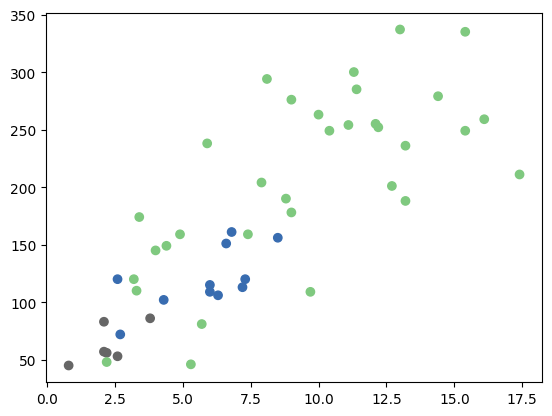

In [ ]:
plt.scatter(crime_data2.Murder,crime_data.Assault,c=cluster_db.labels_,cmap=plt.cm.Accent)

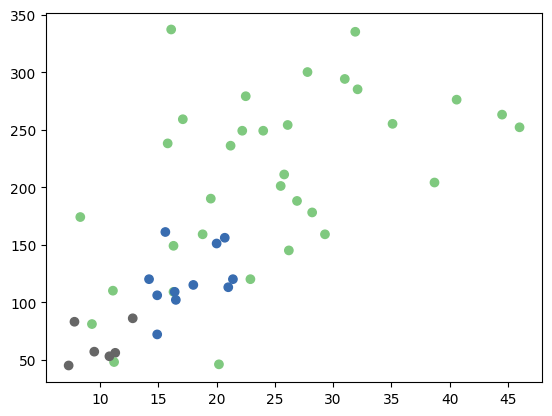

In [ ]:
plt.scatter(crime_data2.Rape,crime_data.Assault,c=cluster_db.labels_,cmap=plt.cm.Accent)

In [ ]:
crime_data2.groupby('cluster').agg(['mean']).reset_index()

# as the dbscan suggests that we should for 2/3 clusters

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,9.439394,207.060606,68.303030,24.500000
1,0,5.845455,120.454545,64.000000,17.600000
2,1,2.266667,63.333333,53.166667,9.916667


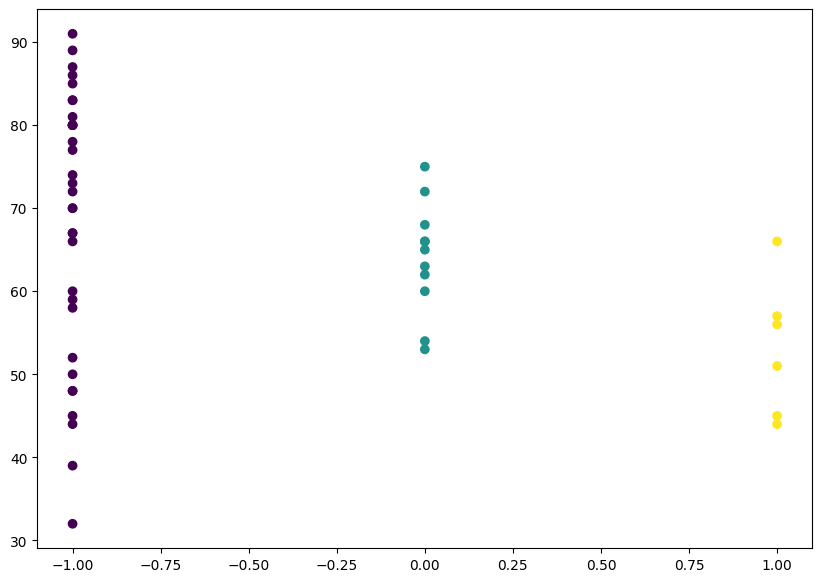

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime_data2['cluster'],crime_data2['UrbanPop'], c=cluster_db.labels_) 

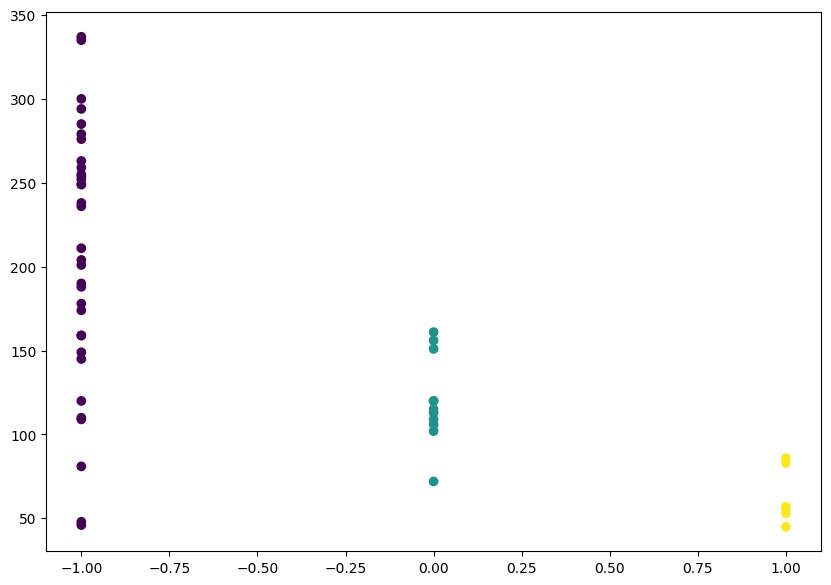

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime_data2['cluster'],crime_data2['Assault'], c=cluster_db.labels_) 

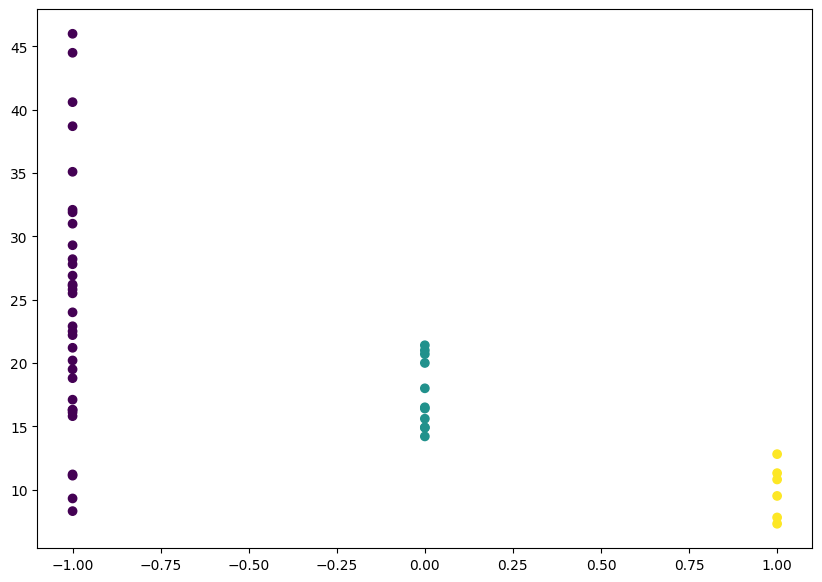

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime_data2['cluster'],crime_data2['Rape'], c=cluster_db.labels_) 

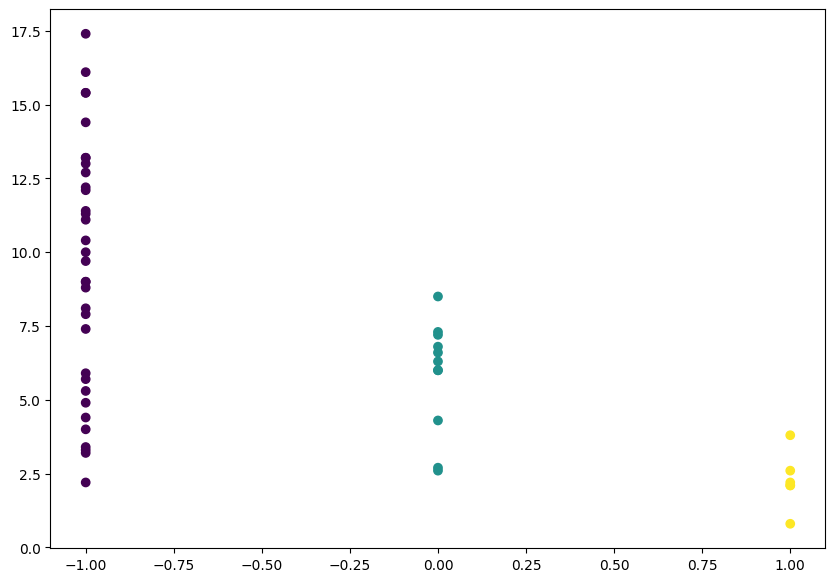

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime_data2['cluster'],crime_data2['Murder'], c=cluster_db.labels_) 

In [ ]:
# but according to each seperate variable/column wise we have to obtain 3 clusters when using dbscan